In [35]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
import os

os.chdir("/Users/daniel.lopes/Projects/personal/ModelCrafter")
from crafter.models.linear_regression import LinearRegression as OLS
from crafter.performance_metrics.regression_metrics import mpe

# Prepare data
data = pd.read_csv("data/raw/prostate-cancer.txt").drop(columns="id")
# X_train, X_test, y_train, y_test = split_data(data=data.drop(columns = "train"), target_column='lcavol', split_method='random', test_size=0.15 ,random_state=42)

# Splitting the data into training and test sets based on the 'train' column
train_data = data[data["train"] == "T"]
test_data = data[data["train"] != "T"]

# Dropping the 'train' and 'lpsa' columns for the feature sets
X_train = train_data.drop(columns=["train", "lpsa"])
X_test = test_data.drop(columns=["train", "lpsa"])

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back into pandas DataFrame and reassign the column names
X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=X_train.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


# Keeping only the 'lpsa' column for the target sets
y_train = train_data[["lpsa"]]
y_test = test_data[["lpsa"]]

In [37]:
model_crafter = OLS(fit_intercept=True)
model_crafter.fit(X_train_scaled, y_train)

# Print the Model Crafter summary
print("Model Crafter Summary:")
summary_df = model_crafter.summary()

Model Crafter Summary:
Feature              | Coefficients    | Std Err    | z          | P>|z|      | [0.025    | 0.975]    
Intercept            | 2.4523          | 0.0810     | 30.2892    | 0.0000     | [2.2937, 2.6110]
lcavol               | 0.7110          | 0.1233     | 5.7676     | 0.0000     | [0.4694, 0.9527]
lweight              | 0.2905          | 0.0982     | 2.9565     | 0.0045     | [0.0979, 0.4830]
age                  | -0.1415         | 0.0943     | -1.5003    | 0.1390     | [-0.3263, 0.0433]
lbph                 | 0.2104          | 0.0952     | 2.2096     | 0.0311     | [0.0238, 0.3971]
svi                  | 0.3073          | 0.1158     | 2.6539     | 0.0103     | [0.0804, 0.5342]
lcp                  | -0.2868         | 0.1430     | -2.0065    | 0.0495     | [-0.5670, -0.0067]
gleason              | -0.0208         | 0.1317     | -0.1577    | 0.8753     | [-0.2788, 0.2373]
pgg45                | 0.2753          | 0.1474     | 1.8678     | 0.0668     | [-0.0136, 0.56

In [38]:
# Evaluate Performance
pred_test = model_crafter.predict(X_test_scaled)
mpe(y_test, pred_test)

6.842748660051048

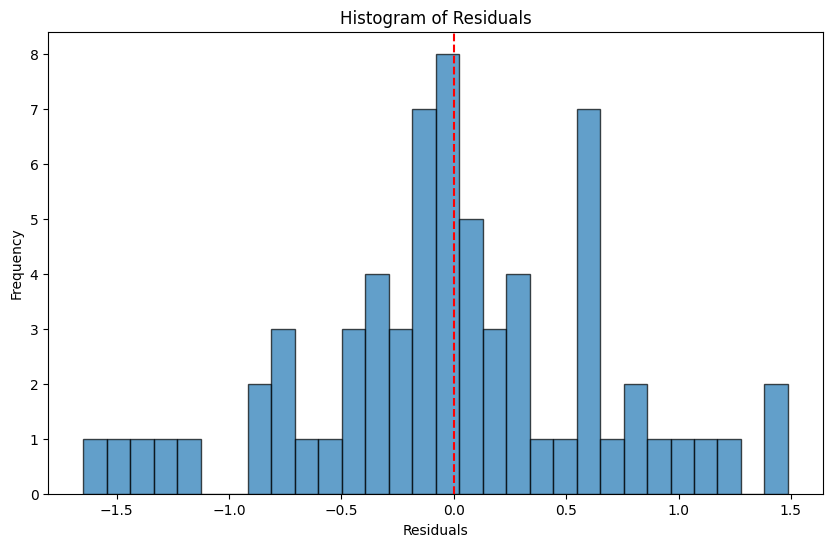

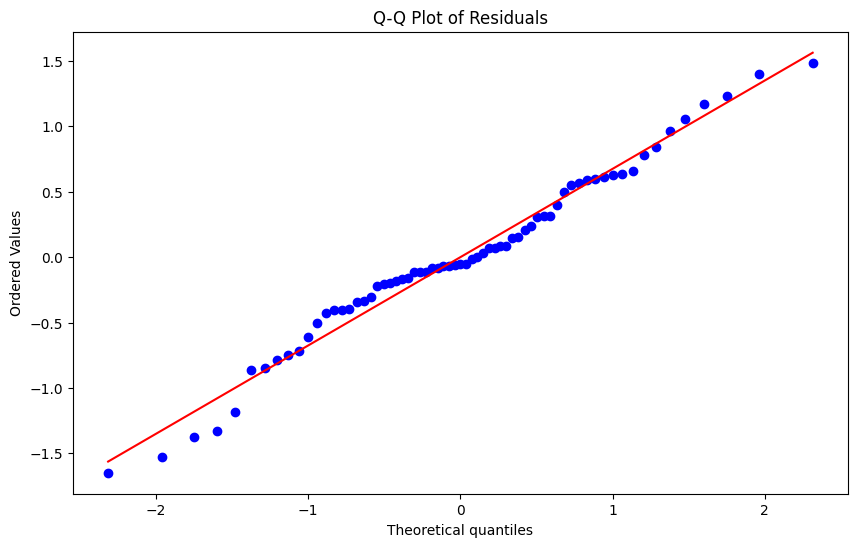

In [39]:
model_crafter.plot_residuals()

In [42]:
significant_features = list(
    summary_df.query("z_abs>=2.1 and feature != 'Intercept' ").feature
)

model_crafter = OLS(fit_intercept=True)
model_crafter.fit(X_train_scaled[significant_features], y_train)

# Print the Model Crafter summary
print("Model Crafter Summary:")
summary_df = model_crafter.summary()

Model Crafter Summary:
Feature              | Coefficients    | Std Err    | z          | P>|z|      | [0.025    | 0.975]    
Intercept            | 2.4523          | 0.0855     | 28.6827    | 0.0000     | [2.2848, 2.6199]
lcavol               | 0.6234          | 0.1098     | 5.6773     | 0.0000     | [0.4082, 0.8387]
lweight              | 0.2549          | 0.1004     | 2.5378     | 0.0137     | [0.0580, 0.4517]
lbph                 | 0.2034          | 0.0984     | 2.0671     | 0.0429     | [0.0105, 0.3962]
svi                  | 0.2801          | 0.1096     | 2.5562     | 0.0130     | [0.0653, 0.4948]


In [44]:
# Evaluate Performance
pred_test = model_crafter.predict(X_test_scaled[significant_features])
mpe(y_test, pred_test)

7.514102798732919

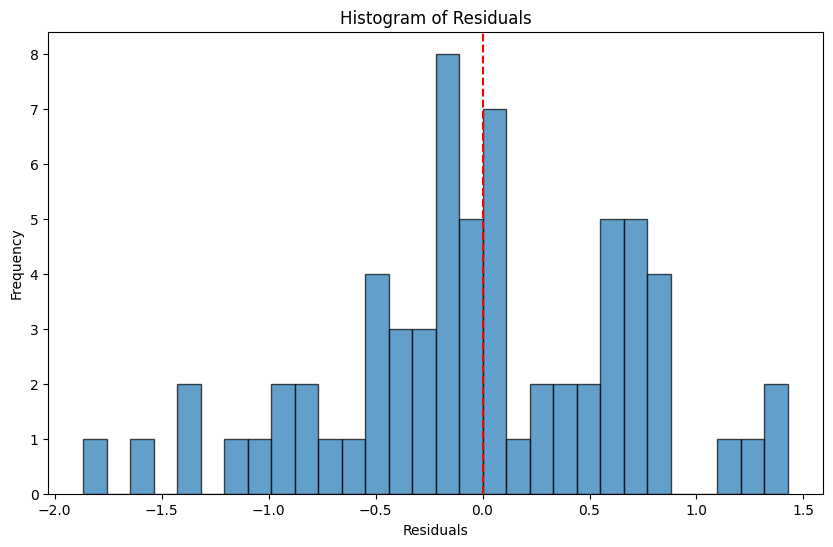

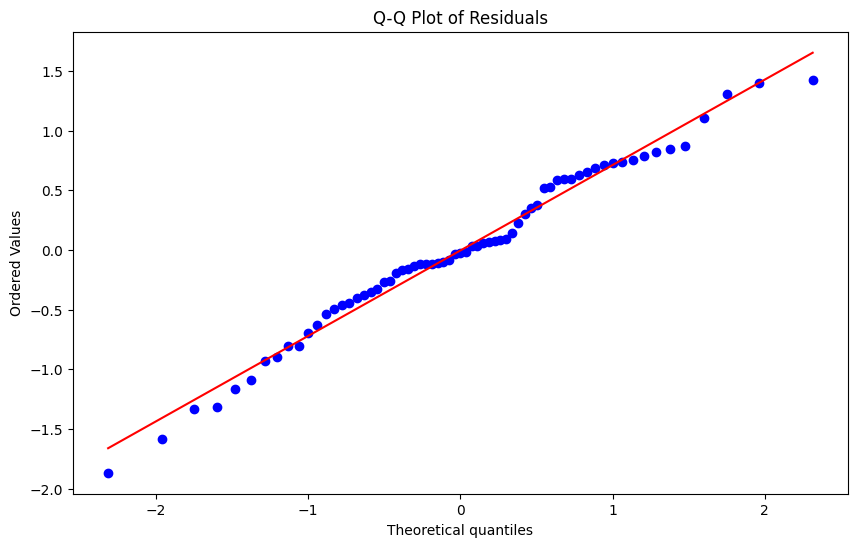

In [25]:
model_crafter.plot_residuals()